In [1]:
# Linear Regression

height->weight
4.0 -> 42
4.5 -> 44
5.0 -> 49
5.2 -> 50
5.4 -> 45
5.8 -> 46
6.1 -> 51


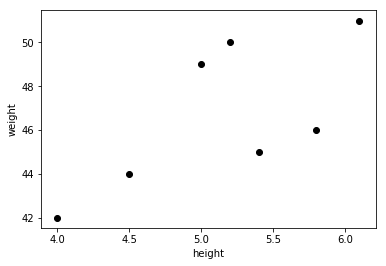

In [3]:
#Simple Linear Regression 

# using height-weight data 
import matplotlib.pyplot as plt
from matplotlib import style

height=[[4.0],[4.5],[5.0],[5.2],[5.4],[5.8],[6.1]]
weight=[42,44,49,50,45,46,51]

print("height->weight")
for row in zip(height,weight):
	print(row[0][0],"->",row[1])

plt.scatter(height,weight,color='black')
plt.xlabel("height")
plt.ylabel("weight")
plt.show(); 

slope= 3.226244343891403 intercept= 30.122171945701357


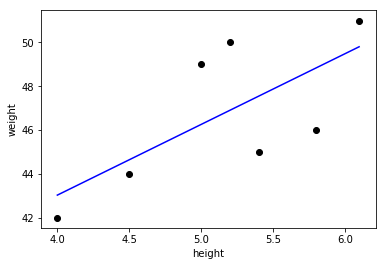

In [4]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression() 
reg.fit(height,weight)

#regression coefficients = m and b 
m=reg.coef_[0]
b=reg.intercept_
print("slope=",m,"intercept=",b) 

plt.scatter(height,weight,color='black')
predicted_value=[reg.coef_ * i + reg.intercept_ for i in height] # y = mi+b where i refers to height and y refers to weight 
plt.plot(height,predicted_value,'b')
plt.xlabel("height")
plt.ylabel("weight")
plt.show()
 

In [5]:
#Multi Linear Regression

In [7]:
# using stock data from Quandl 
import quandl as Quandl, math
import numpy as np
import pandas as pd 
from sklearn import preprocessing, model_selection as cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from matplotlib import style 
import datetime 

In [8]:
style.use('ggplot')

In [10]:
df = Quandl.get("WIKI/AMZN", api_key = 'tJbUksb_TeZXtwAgDeia') #quandl acting as a connector for taking out the data from quandl 
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
print(df.head(5))

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume
Date                                                               
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0
1997-05-22   1.437500   1.448333  1.312500    1.395833   11776800.0


In [11]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0         #HL_PCT : highlow percentage 
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0  #PCT_change : percentage change 


In [12]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
print(df.head(5))

            Adj. Close     HL_PCT  PCT_change  Adj. Volume
Date                                                      
1997-05-16    1.729167  15.853659   -7.283289   14700000.0
1997-05-19    1.708333   8.974359    0.000000    6106800.0
1997-05-20    1.635833   6.979114   -5.397590    5467200.0
1997-05-21    1.427500  19.696970  -11.012987   18853200.0
1997-05-22    1.395833  10.349206   -2.898551   11776800.0


In [13]:
df.fillna(value = - 99999, inplace = True)   #replacing NA values with -99999 so that it lies in outliers 
forecast_out = int(math.ceil(0.01*len(df)))  #taking out 1% of data for prediction (testing) 

df['label'] = df[forecast_col].shift(-forecast_out) # why do we shift -forecast_out ? = removing 1% data from train data 


In [15]:
X = np.array(df.drop(['label'], 1)) #X is set of features 
X = preprocessing.scale(X)          #Scaling is done so that the units of different columns scale to a common one 
X_lately = X[-forecast_out:]        # what is X_lately ?

X = X[:-forecast_out]      # only the last row 

In [16]:
df.dropna(inplace = True) #dropping off all NA values 

In [17]:
y = np.array(df['label'])

In [21]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2) #testing data is 20%
clf = LinearRegression(n_jobs = - 1) #n_jobs=-1 means the model will run in sequential manner 
                                     #n_jobs = 2 means the model will run using 2 CPUs 
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('Confidence: ', confidence)   

Confidence:  0.975278404784871


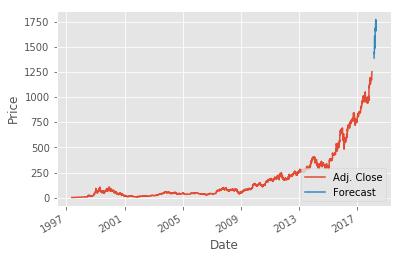

In [22]:
#Predict for the forecast set
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan   # what is meaning of np.nan? - nan refers to NA value 

#Predict for every day after the last day in training set
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400          # 24*3600 seconds in one day 
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
    
#Plot the graph for visualization
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# in the above plot, red is trained data and blue is in predicted data 

In [23]:
#Store the model
# pickle writes model into a file 

#in future, we can use the file by importing the already trained model and do predictions 

import pickle
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
    

c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


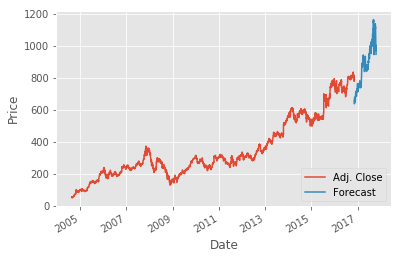

In [24]:
import quandl as Quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

df = Quandl.get("WIKI/GOOGL", api_key='tJbUksb_TeZXtwAgDeia')
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# conceptual error in the above code - that we have trained the data for amazon stock data but this time ( in the above code example), 
# we are doing predictions in google stock data 

In [26]:
# Polynomial Regression 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create matrix and vectors
X = [[0.44, 0.68], [0.99, 0.23]]
y = [109.85, 155.72]
X_test = [[0.49, 0.18]]

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)

print('The polynomial features generated:')
print(poly.get_feature_names())

X_test_ = poly.fit_transform(X_test)
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
print(lg.coef_)

lg.predict(X_test_)

The polynomial features generated:
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']
[ 0.         11.45293462 -9.37058287 16.37769651 -1.4888815  -8.52723041
 18.43120768  1.95272535 -3.14612114 -6.29422051]


array([122.80859964])

In [27]:
# in the above code , is it right ???
# features = 10 
# coefficients = 9

In [28]:
# Ridge Regression 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [30]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

In [31]:

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

In [32]:
# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)


In [33]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

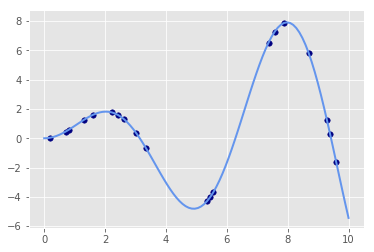

In [34]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

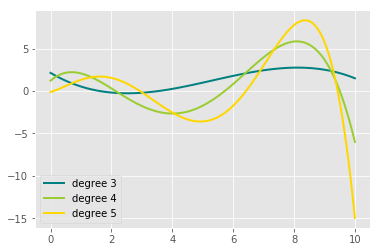

In [35]:
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()